In [1]:
import sys, os, pathlib
#setting the path to folder with modules
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[1] / 'python'))
from Load_Datasets import *

In [2]:
FileAddress_movies ="../../Datasets/tmdb_5000_movies.csv"
FileAddress_credits="../../Datasets/tmdb_5000_credits.csv"

In [3]:
#Loading information about movies
Movies,Credentials  = Load_Datasets(FileAddress_movies,FileAddress_credits)

Drops = ['homepage','status','id']
for drop in Drops:
    Movies = Movies.drop(drop, 1)
        
Movies.to_csv("../../Datasets/Transformed.csv")

In [4]:
Movies

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,genres_id,keywords_id,production_companies_id,actors,actors_id,actor_gender,crew_names,crew_names_id,crew_jobs,crew_departments
title,,,,,,,,,,,,,,,,,,,,,
#Horror,1500000,"Drama,Mystery,Horror,Thriller",,de,#Horror,"Inspired by actual events, a group of 12 year ...",2.815228,"AST Studios,Lowland Pictures",United States of America,2015-11-20,...,"18,9648,27,53",,"75277,75278","Taryn Manning,Natasha Lyonne,Chloë Sevigny,Bal...","343,10871,2838,9296,16327,210573,180425,110233...","1,1,1,2,2,1,0,0,1","Tara Subkoff,Tara Subkoff,Tara Subkoff,Jason L...","61111,61111,61111,1382445,1382446,1382448","Screenplay,Director,Producer,Producer,Producer...","Writing,Directing,Production,Production,Produc..."
(500) Days of Summer,7500000,"Comedy,Drama,Romance","date,sex,jealousy,fight,architect,gallery,inte...",en,(500) Days of Summer,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"Fox Searchlight Pictures,Watermark,Dune Entert...",United States of America,2009-07-17,...,"35,18,10749","248,572,931,1721,2301,2861,4434,5923,8508,9673...","43,4364,6332","Joseph Gordon-Levitt,Zooey Deschanel,Chloë Gra...","24045,11664,56734,5375,5661,9048,56358,96624,9...","2,1,1,2,2,2,1,1,1,2,2,1,1,0,2,1,0,0,1,0,0,2,0","Mychael Danna,Hope Hanafin,Steven J. Wolfe,Mas...","5359,16469,22433,52446,52449,53648,54050,66519...","Original Music Composer,Costume Design,Produce...","Sound,Costume & Make-Up,Production,Production,..."
10 Cloverfield Lane,15000000,"Thriller,Science Fiction,Drama","kidnapping,bunker,paranoia,basement,survivalis...",en,10 Cloverfield Lane,"After a car accident, Michelle awakens to find...",53.698683,"Paramount Pictures,Bad Robot,Spectrum Effects",United States of America,2016-03-10,...,"53,878,18","1930,2321,2340,9866,10833,12332,13063,15381","4,11461,78177","Mary Elizabeth Winstead,John Goodman,John Gall...","17628,1230,17487,51329,60881,1354257,8269,1413...","1,2,2,2,2,0,1,0,2,0","Monika Mikkelsen,J.J. Abrams,Matthew W. Mungle...","2325,15344,23788,69506,59811,66491,92336,13649...","Casting,Producer,Makeup Effects,Director of Ph...","Production,Production,Crew,Camera,Sound,Art,Cr..."
10 Days in a Madhouse,1200000,Drama,"undercover,insane asylum,reporter",en,10 Days in a Madhouse,"Nellie Bly, a 23 year-old reporter for Joseph ...",0.489271,,United States of America,2015-11-20,...,18,"1568,4924,12193",,"Caroline Barry,Christopher Lambert,Kelly LeBro...","1478271,38559,46948,1239372,1478272,1478273,14...","0,2,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,2,0","Martin Wiley,Jan Glaser,Strathford Hamilton,Ma...","64468,71716,998473,1011452,1128550,1128550,113...","Producer,Casting,Executive Producer,Executive ...","Production,Production,Production,Production,Di..."
10 Things I Hate About You,16000000,"Comedy,Romance,Drama","shakespeare,sister,high school,cannabis,decept...",en,10 Things I Hate About You,"Bianca, a tenth grader, has never gone on a da...",54.550275,"Mad Chance,Jaret Entertainment,Touchstone Pict...",United States of America,1999-03-30,...,"35,10749,18","497,5923,6270,8224,9758,11870,53994,53995,1561...","1757,1783,9195","Heath Ledger,Julia Stiles,Joseph Gordon-Levitt...","1810,12041,24045,40978,38582,40979,40980,17773...","2,1,2,1,2,2,1,1,2,2,1,2,2,0,2,0,2,0,0,0,0,1,0,...","Charles Graffeo,William Shakespeare,Mark Irwin...","1800,6210,7413,16593,20359,21068,29525,32279,4...","Set Decoration,Theatre Play,Director of Photog...","Art,Writing,Camera,Editing,Costume & Make-Up,S..."
102 Dalmatians,85000000,"Comedy,Family","london england,prison,release from prison,wome...",en,102 Dalmatians,Get ready for a howling good time as an all ne...,9.895061,"Walt Disney Pictures,Cruella Productions",United States of America,2000-10-07,...,"35,10751","212,378,3398,5424,6491,8841,8905,15162,158369","2,10472","Glenn Close,Ioan Gruffudd,Alice Evans,Tim McIn...","515,65524,65535,41043,16927","1,2,1,2,2","David N

Here we will present distributions of different features of the movies, i.e. movies budget, revenue, average vote, vote counts, popularity, number of actors and number of movies cast.

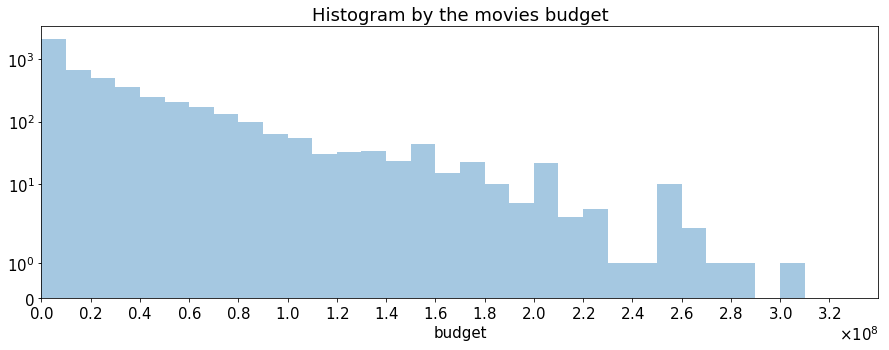

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
fontsizes = 15
matplotlib.rcParams.update({'font.size': fontsizes})
fig, axes = plt.subplots(figsize=(15, 5))

# Budget is plotted in log scale on y axis
axes.set(yscale="symlog")

# Here we will set appropriate range of values x-axis and binsize so that ticks on x-coordinate correspond to 
# the end of every second bin
# for every other data i.e. reveunue, average vote, etc. the values of bin_size will be specific
# hence this procedure will be conducted for each column of interest

bin_size = 0.1*1e8
bins_hist = np.arange(min(Movies["budget"]), max(Movies["budget"]), bin_size)
g = sns.distplot(Movies['budget'], bins = bins_hist, kde=False, rug=False)
plt.xlim(0*1e8,3.4*1e8)
ticks = np.arange(0*1e8,3.4*1e8,0.2*1e8)
axes.set_xticks(ticks)
g.set(title='Histogram by the movies budget')
g.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True, useOffset=False))
plt.show()

Here is presented logarithmic vs. linear scale distribution of movies budget, due to tailed nature of distribution. We can notice there is a lot of movies with low budget less than $10^{8}$, and a small number of movies with budget grater than  $3*10^{8}$

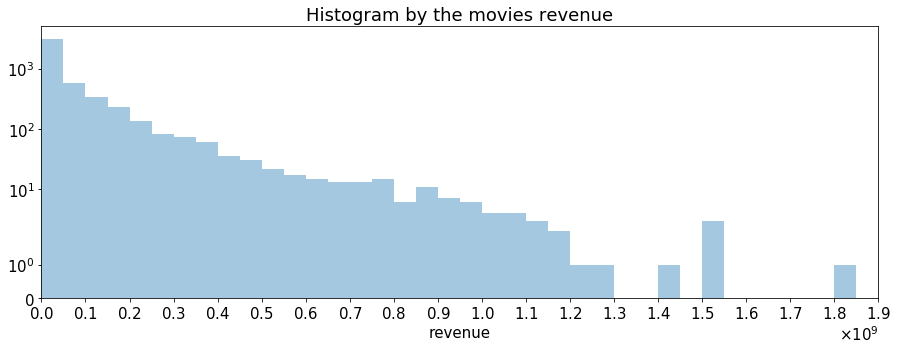

In [6]:
fig, axes = plt.subplots(figsize=(15, 5))
# Revenue is plotted in log scale on y axis
axes.set(yscale="symlog")

# Here we will set appropriate range of values on x-axis and binsize so that ticks on x-coordinate correspond to
# the end of every second bin

bin_size = 0.05*1e9
bins_hist = np.arange(min(Movies["revenue"]), max(Movies["revenue"]), bin_size)
g = sns.distplot(Movies['revenue'], bins = bins_hist, kde=False, rug=False)
plt.xlim(0,1.9*1e9)
g.set(title='Histogram by the movies revenue')
ticks = np.arange(0*1e9,2*1e9,0.1*1e9)
axes.set_xticks(ticks)
g.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True, useOffset=False))
plt.show()

The presented distribution has been plotted in logarithmic vs. linear scale, due to tailed nature of data. The revenue of the movie has usually value less than $10^{9}$, the its distribution is haevily tailed.The range of movies revenue is from $(0, 2.8*10^{9})$

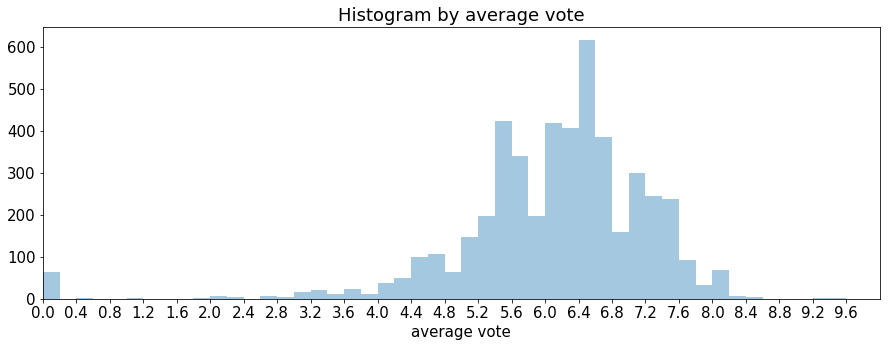

In [7]:
fig, axes = plt.subplots(figsize=(15, 5))

# Here we will set appropriate range of values on x-axis and binsize so that ticks on x-coordinate correspond to
# the end of every second bin

bin_size = 0.2
bins_hist = np.arange(min(Movies["vote_average"]), max(Movies["vote_average"]), bin_size)
g = sns.distplot(Movies['vote_average'], bins = bins_hist, kde=False, rug=False)
plt.xlim(0,10)
ticks = np.arange(0,10,0.4)
axes.set_xticks(ticks)
g.set(title='Histogram by average vote', xlabel = "average vote")
plt.show()

Movies can receive a vote in range 0-10 from user. Average vote is calculated as mean value of all existing votes for that movie. The most frequent vote is less near 6.5. Also, one could notice there is a lot of average_votes in intervals 5.4-5.8,  6.0-6.8, and 7.0-7.6 compared to their "neighbourhood" intervals. There is a lot of movies with vote 0, so it could mean that 0 is written for  movies who has not given the vote

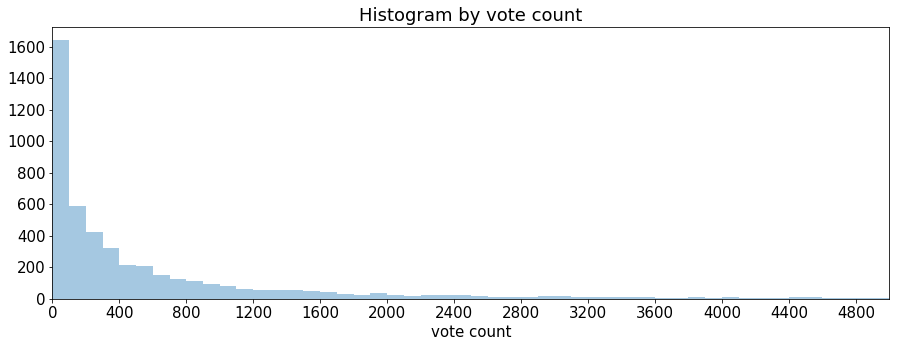

In [8]:
fig, axes = plt.subplots(figsize=(15, 5))

# Here we will set appropriate range of values on x-axis and binsize so that ticks on x-coordinate correspond to
# the end of every fourth bin

bin_size = 100
bins_hist = np.arange(min(Movies["vote_count"]), max(Movies["vote_count"]), bin_size)
g = sns.distplot(Movies['vote_count'], bins = bins_hist, kde=False, rug=False)
plt.xlim(0,5000)
ticks = np.arange(0,5000, 400)
axes.set_xticks(ticks)
g.set(title='Histogram by vote count', xlabel = "vote count")
plt.show()

Distribution of vote count is tailed, usually movies has less than 400 votes, and vast majority has less than 2000 votes

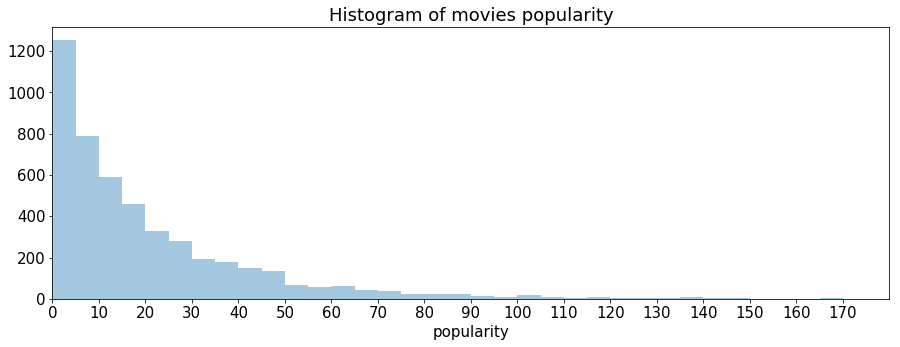

In [9]:
fig, axes = plt.subplots(figsize=(15, 5))

# Here we will set appropriate range of values on x-axis and binsize so that ticks on x-coordinate correspond to
# the end of every second bin

bin_size = 5
bins_hist = np.arange(min(Movies["popularity"]), max(Movies["popularity"]), bin_size)
g = sns.distplot(Movies['popularity'], bins = bins_hist, kde=False, rug=False )
plt.xlim(0,180)
ticks = np.arange(0,180,10)
axes.set_xticks(ticks)
g.set(title='Histogram of movies popularity')
plt.show()

A lot of movies has a low popularity, it seems like 0 is popularity when movie has not given the popularity data 

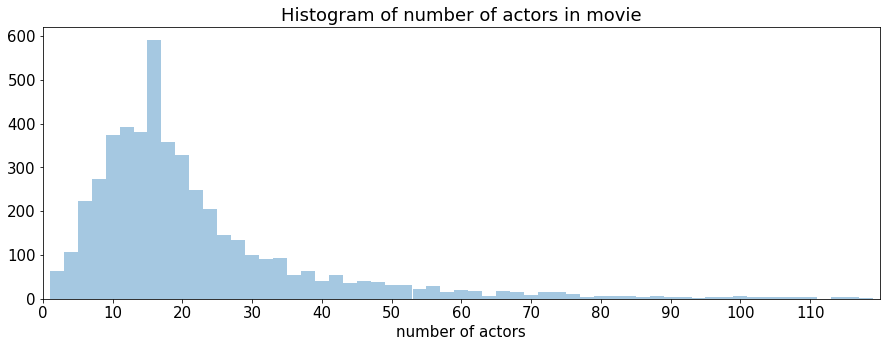

In [10]:
num_of_elements = lambda x: len(x.split(","))
num_of_actors = Movies["actors_id"].apply(num_of_elements)

fig, axes = plt.subplots(figsize=(15, 5))

# Here we will set appropriate range of values on x-axis and binsize so that ticks on x-coordinate correspond to
# the end of every second bin

bin_size = 2
bins_hist = np.arange(min(num_of_actors), max(num_of_actors), bin_size)
g = sns.distplot(num_of_actors, bins=bins_hist, kde=False, rug=False )
plt.xlim(0,120)
ticks = np.arange(0,120,10)
axes.set_xticks(ticks)
g.set(title='Histogram of number of actors in movie', xlabel = "number of actors")
plt.show()

The mode of actors in the movie is 15 or 16, and it does not fit very well in the rest of the distribution. Just a couple of movies has more then 100 actors

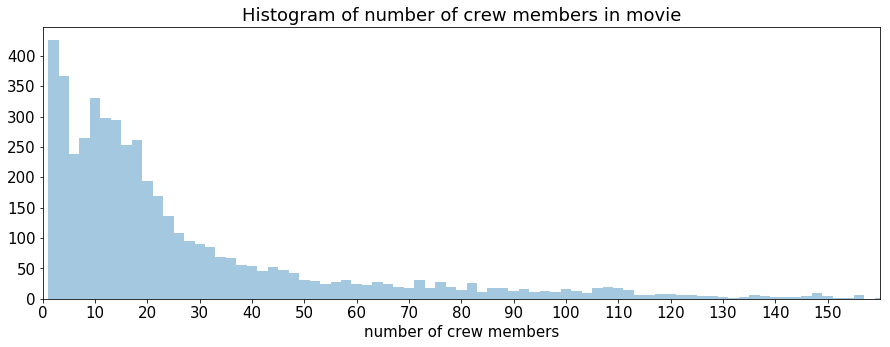

In [11]:
num_of_crew = Movies["crew_names_id"].apply(num_of_elements)

fig, axes = plt.subplots(figsize=(15, 5))

# Here we will set appropriate range of values on x-axis and binsize so that ticks on x-coordinate correspond to
# the end of every fifth bin

bin_size = 2
bins_hist = np.arange(min(num_of_actors), max(num_of_actors), bin_size)
g = sns.distplot(num_of_crew, bins = bins_hist, kde=False, rug=False )
plt.xlim(0,160)
ticks = np.arange(0,160,10)
axes.set_xticks(ticks)
g.set(title='Histogram of number of crew members in movie', xlabel = "number of crew members")
plt.show()

The number of crew members is most times less than 50, and there is some movie up to 200 crew members. It is more frequent to have cast larger than 50 crew members, than 50 actors which is expected

Now, we will find the most frequent keywords, crew members, production companies, actors and genres:

Here is the function which we use for representing most frequent how_much (i.e. 10) production companies and actors. What we are looking for we will call the item in the comments and code i.e. items are production companies or actors

In [12]:
def most_freq_items_with_id(how_much, col, col_id):
    # how_much: how_much top frequent items fo we search for, type:int
    # col: name of the column in Movies dataframe which has also corresponding id column i.e. "production_companies", type:string
    # col_id: name of the column in Movies dataframe with ids
    
    # Due to the fact that the id's as integers are more reliable data than the string type of data
    # we will find most frequent item's ids, and then look for the items name given in the column Movies[col]
    # of course we assume that we have obtained correct match between (items name, items id)

    # Here we will find the number of occurency of each items_id in database,
    # and store it in dictionary items_id_dict in pairs (items_id(type:int):items_name(type:string))
    # we will store in dictionary freq_items_ids in pairs (items_id(type:int):number_of_occurency(type:int))

    items_id_dict = {}
    freq_items_ids = {}
    
    for i in range(len(Movies)):
        for j in range(len(Movies.iloc[i][col_id].split(","))):
            if (len(Movies.iloc[i][col_id].split(",")[j])>0):
                items_id_int_key = int(Movies.iloc[i][col_id].split(",")[j])
                freq_items_ids[items_id_int_key] = freq_items_ids.get(items_id_int_key, 0) + 1
                items_id_dict[items_id_int_key] = Movies.iloc[i][col].split(",")[j]
    
    # Here we will find most how_much frequent items names
    # We will "sort" the dictionary of occurency by values, retrieve the ids of most frequent ones
    # and find corresponding names and store in most_freq_items
 
    how_much_items = how_much; 
    most_freq_ids = sorted(freq_items_ids, key=freq_items_ids.get)[-how_much_items:] #list
    most_freq_items = [items_id_dict[key]  for key in most_freq_ids]

    fig, ax = plt.subplots(figsize=(15,5))

    # in freq_items_plot is stored number_of-occurency in dataset of most frequent items
    freq_items_plot = [freq_items_ids[most_freq_ids[how_much_items-i-1]] for i in range(how_much_items)]
    plt.bar(range(how_much_items), freq_items_plot)
    string_title = col.replace("_"," ")
    plt.title("Most {} frequent ".format(how_much_items)+string_title)
    plt.xticks(range(how_much_items),(most_freq_items[::-1]), rotation=45, rotation_mode="anchor", ha="right")
    for i in ax.patches:
        ax.text(i.get_x()+.1, i.get_height(),str(round((i.get_height()))), fontsize=15, color='black')
    plt.show()

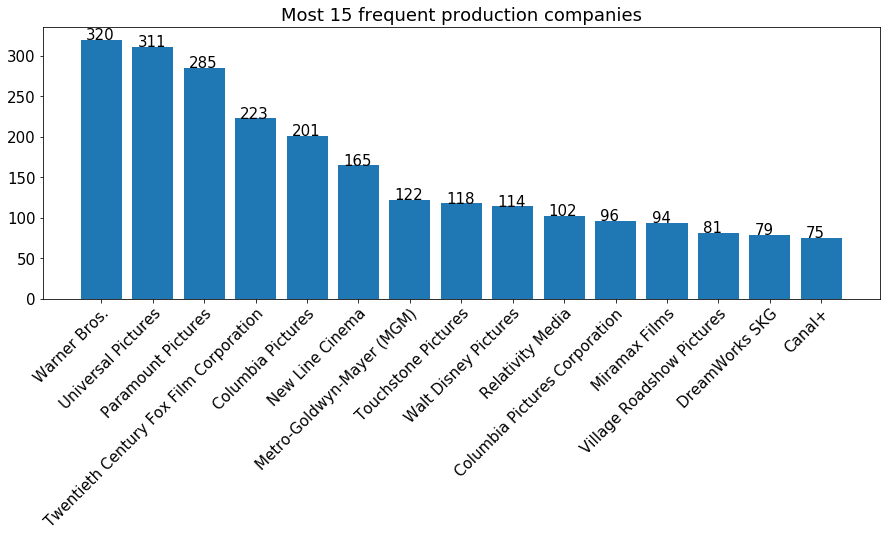

In [13]:
how_much_production = 15
column = "production_companies"
column_id = "production_companies_id"
most_freq_items_with_id(how_much_production, column, column_id)

Here are shown 15 most frequent production companies. The first three companies has made around 300 movies each which is nearly 20% of all the movies. The next three companies has made more than 150 movies each, and they are followed by the rest top companies who made 100 movies on average. 

It seems like we have dominant production companies: Warner Bros. Universal Pictures and Paramount Pictures

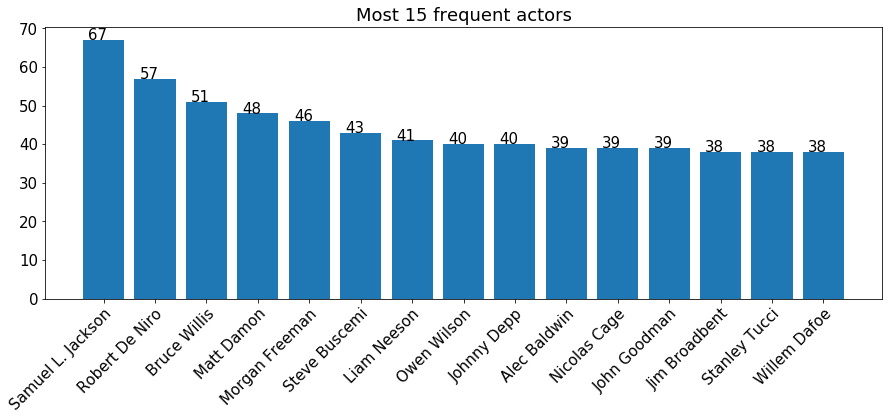

In [14]:
how_much_actors = 15
column = "actors"
column_id = "actors_id"
most_freq_items_with_id(how_much_production, column, column_id)

Here are shown 15 most frequent actors. All of them has shown up in more than 40 movies.
The most frequent actor Samuel L. Jaskson has been in nearly 70 movies, after the distribution of the top actors slowly decrease

Here is the function which we use for representing most frequent how_much (i.e. 10) keywords, crew and genres. What we are looking for we will call the item in the comments and code (i.e. item is keyword crew_name or genre)

In [15]:
def most_freq_items(how_much, col):
    # how_much: how_much top frequent items fo we search for, type:int
    # col: name of the column in Movies dataframe i.e. "keywords", type:string
    # string_title: string for title "Most how_much frequent"+string_title i.e. string_title="keywords", type:string
    
    # This function will be used to find most frequent keywords, crew_names and genres
    # Here we will find the number of occurency of each keyword in database,
    # and store it in dictionary items_dict in pairs (item(type:str):number_of_occurency(type:int))
    items_dict = {}

    for i in range(len(Movies)):
        if(len(Movies.iloc[i][col])>0):
            for j in range(len(Movies.iloc[i][col].split(","))):
                if (len(Movies.iloc[i][col].split(","))>0):
                    item = Movies.iloc[i][col].split(",")[j]
                    items_dict[item] = items_dict.get(item, 0) + 1
    # Here we will find most how_much_items frequent keywords
    # We will "sort" the dictionary by values, retrieve the ids, and find the most frequent items from original dictionary
    
    how_much_items = how_much
    most_freq_items = sorted(items_dict, key=items_dict.get)[-how_much_items:]
    
    fig, ax = plt.subplots(figsize=(15,5))
    
    freq_items_plot = [items_dict[most_freq_items[len(most_freq_items)-1-i]] for i in range(how_much_items)]
    plt.bar(range(how_much_items), freq_items_plot)
    string_title = col.replace("_"," ")
    plt.title("Most {} frequent ".format(how_much_items) + string_title)
    plt.xticks(range(how_much_items),(most_freq_items[::-1]), fontsize=15, rotation=45, rotation_mode="anchor", ha="right")
    for i in ax.patches:
        ax.text(i.get_x()+.1, i.get_height(),str(round((i.get_height()))), fontsize=15, color='black')
    plt.show()

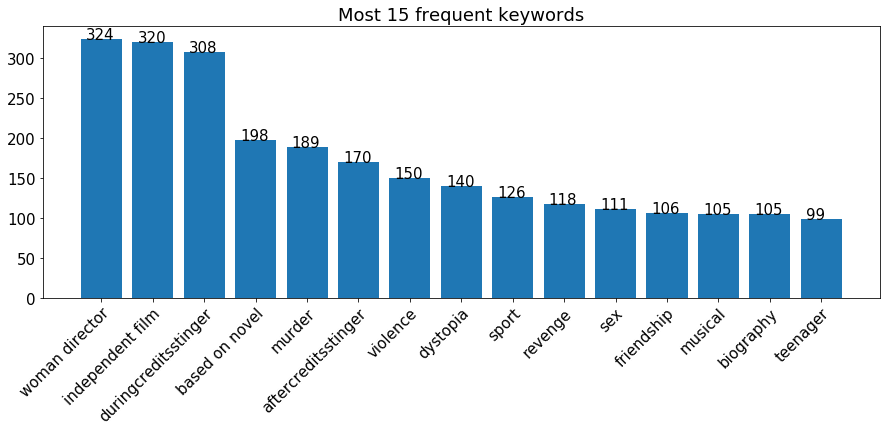

In [16]:
how_much_keywords = 15
column = "keywords"

most_freq_items(how_much_keywords, column)

We can see that some words are very frequent in keywords . Woman director is most used keyword, and having in mind that we have nearly 4800 movies, the women director shows up as keyword in nearly 7% of movies

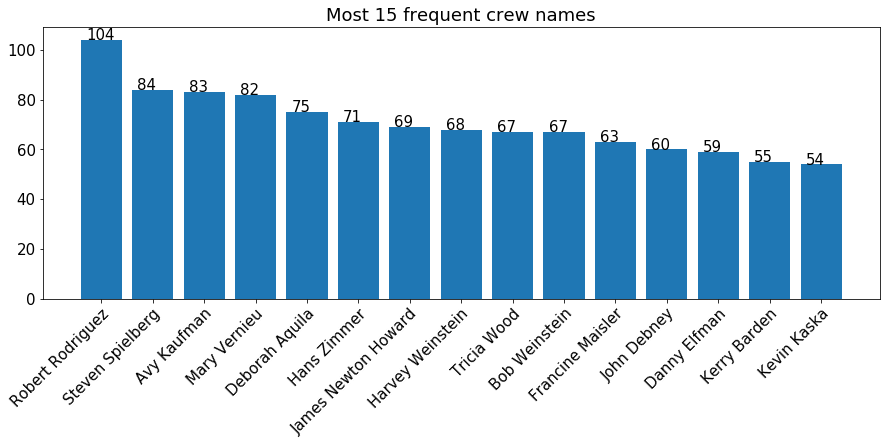

In [17]:
how_much_crew = 15
column = "crew_names"

most_freq_items(how_much_crew, column)

Here are shown the most frequent 15 crew names. Most working crew member is Robert Rodriguez with more than 100 movies, and the next member has been in nealry 80 movies. After these names, the number of different crew's movies slowly decrease form 80 to 60

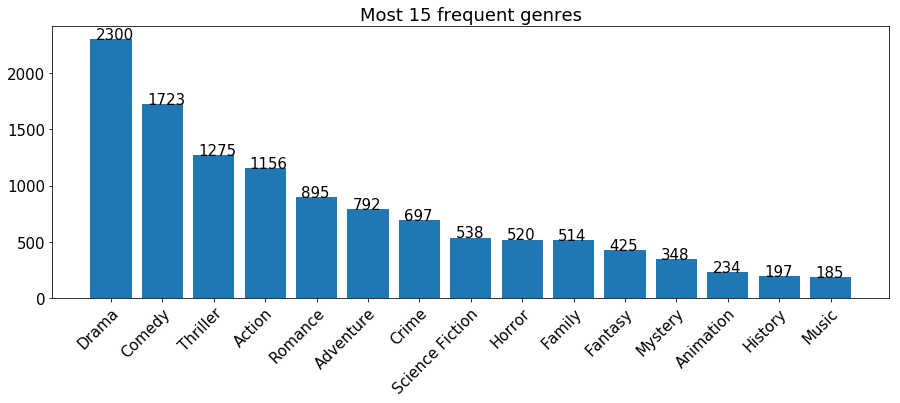

In [18]:
how_much_genre = 15
column = "genres"

most_freq_items(how_much_genre, column)

Drama, Comedy and Thriller are most frequent genres. It seems like more than 40% movies has drama in its genre description

Now we will look for correlation between numerical data such as budget, revenue, runtime, popularity, vote_average and vote_count. We expect to see high correlation between budget vs. revenue and popularity vs. vote_count, vote_average. Also not so high but still present correlation is expected at popularity vs. budget, revenue, and possible runtime vs popularity

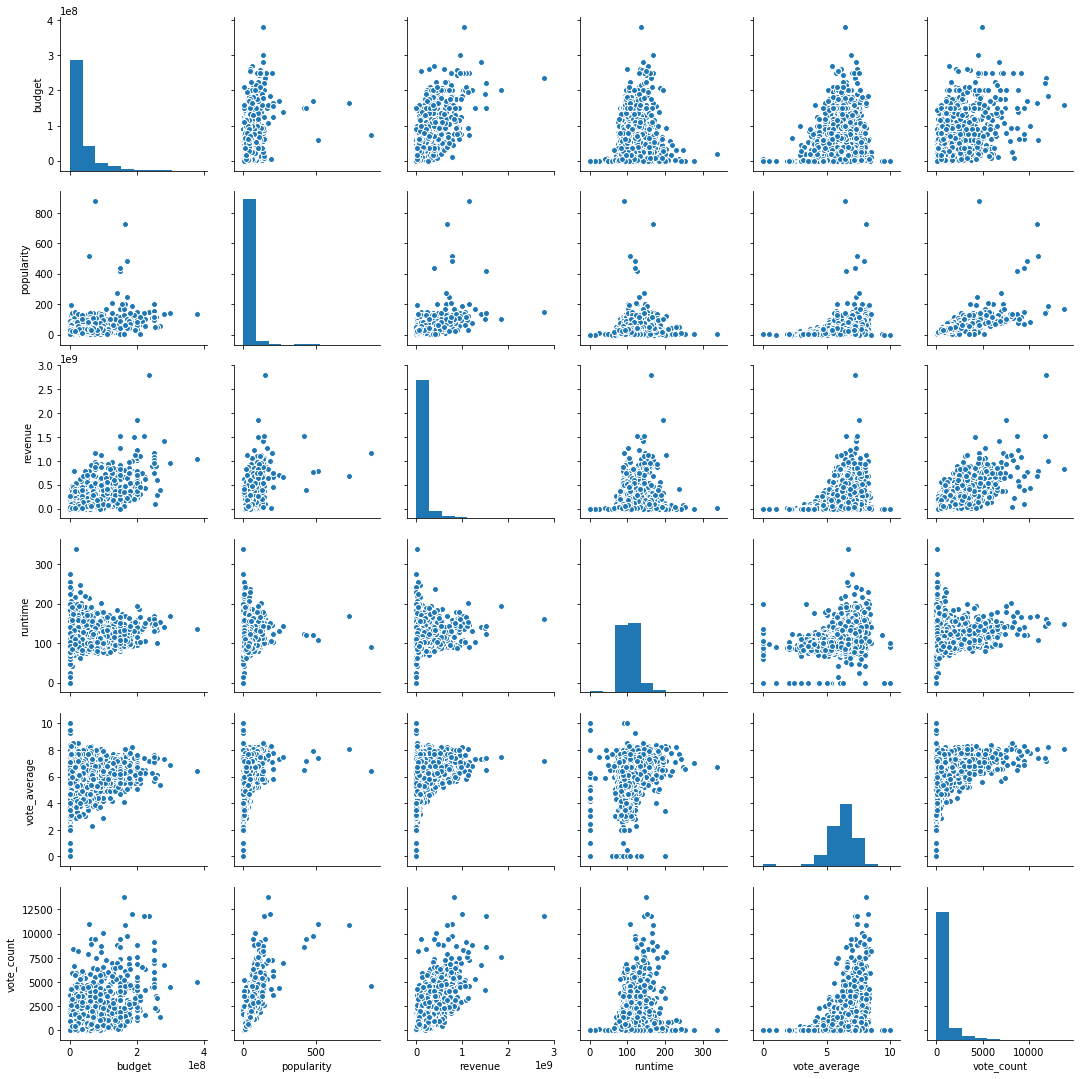

In [22]:
sns.pairplot(Movies[["budget","popularity","revenue","runtime","vote_average","vote_count"]].dropna())

In [23]:
len(Movies[["budget","popularity","revenue","runtime","vote_average","vote_count"]].dropna())

4807

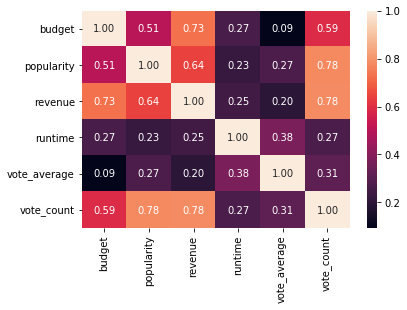

In [24]:
sns.heatmap(Movies.corr(), annot=True, fmt=".2f")

In the heatmap is quantified correlation between the data by Pearson coefficient. High value of correlation coefficents are 
obtained in case of: popularity vs vote_count, budget vs revenue, and slightly lower value in case of popularity vs revenue
vote count vs budget, popularity vs budget. Because between these data there exist some relatively high correlation, we can
pick just some of attributes as features, and lower dimensionality of our feature vector without losing to much information
One of the proposal is to include budget and popularity in the feature vector - we can skip this

In [25]:
# How many movies have tagline
len(Movies["tagline"].dropna())

3965

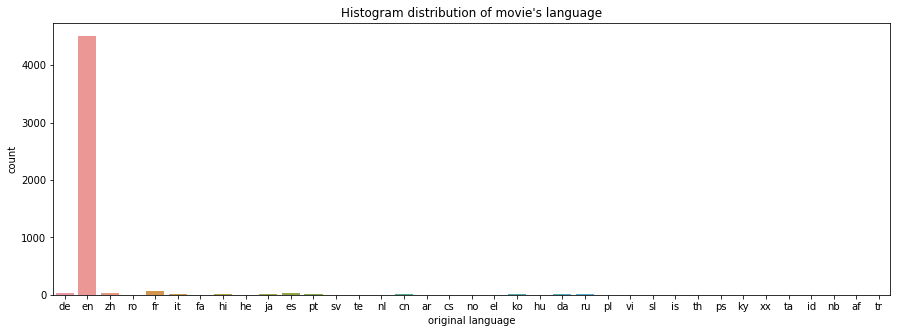

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(15, 5))

axes = sns.countplot(x="original_language", data=Movies)
plt.title("Histogram distribution of movie's language")
plt.xlabel("original language")
plt.show()

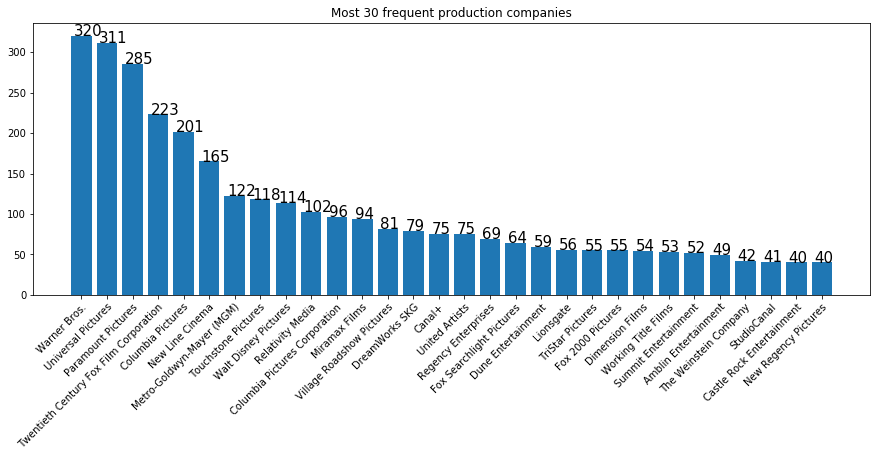

In [27]:
how_much_production = 30
column = "production_companies"
column_id = "production_companies_id"
most_freq_items_with_id(how_much_production, column, column_id)

Here we will present most frequent production countries

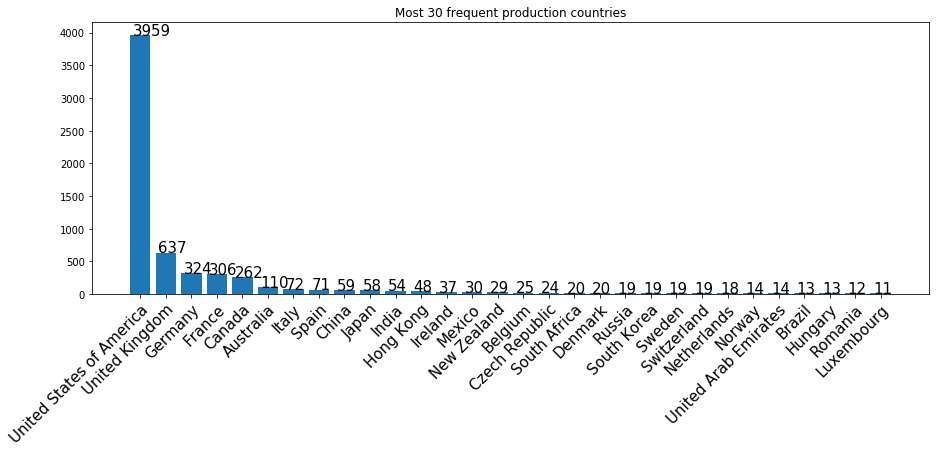

In [28]:
how_much_prod = 30
column = "production_countries"
most_freq_items(how_much_prod, column)

The most movies comes from the United States of America. We believe that with including this attribute we would get unbalanced set, hence this attribute will not be included in feature vector

Original language of the movie is the movie language that is most of time spoken.Here we will present the most frequent original languages.

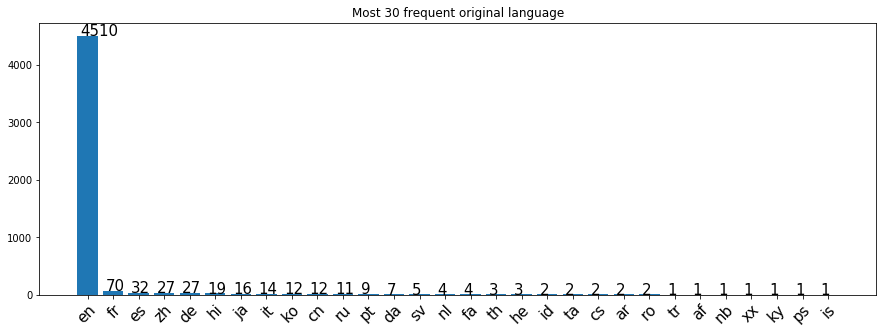

In [29]:
how_much_lang = 30
column = "original_language"
most_freq_items(how_much_lang, column)

The dominant language is English with frequency greater than 90%. From the same reason as before,original language we will not
include in the feature vector. Moreover, we do not expect other attributes such that: realise date, are connected with movies genre